In [ ]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
from skimage import io, color
import tensorflow as tf
from tqdm import tqdm

In [0]:
#Taking the paths for train images
x_tr = tf.data.Dataset.list_files((str(pathlib.Path('idd20k_lite/leftImg8bit/train')/'*/*')),shuffle=False)

In [0]:
#Taking the paths for train masks
y_tr = tf.data.Dataset.list_files((str(pathlib.Path('idd20k_lite/gtFine/train')/'*/*_inst_label.png')),shuffle=False)

In [10]:
for f in x_tr.take(5):
    print(f.numpy())

b'idd20k_lite/leftImg8bit/train/0/024541_image.jpg'
b'idd20k_lite/leftImg8bit/train/0/024703_image.jpg'
b'idd20k_lite/leftImg8bit/train/1/092468_image.jpg'
b'idd20k_lite/leftImg8bit/train/1/340676_image.jpg'
b'idd20k_lite/leftImg8bit/train/1/502201_image.jpg'


In [11]:
for f in y_tr.take(5):
    print(f.numpy())

b'idd20k_lite/gtFine/train/0/024541_inst_label.png'
b'idd20k_lite/gtFine/train/0/024703_inst_label.png'
b'idd20k_lite/gtFine/train/1/092468_inst_label.png'
b'idd20k_lite/gtFine/train/1/340676_inst_label.png'
b'idd20k_lite/gtFine/train/1/502201_inst_label.png'


In [0]:
#Taking the paths for validation images
x_val = tf.data.Dataset.list_files((str(pathlib.Path('idd20k_lite/leftImg8bit/val')/'*/*')),shuffle=False)

In [0]:
#Taking the paths for validation masks
y_val = tf.data.Dataset.list_files((str(pathlib.Path('idd20k_lite/gtFine/val')/'*/*_inst_label.png')),shuffle=False)

In [14]:
for f in x_val.take(5):
    print(f.numpy())

b'idd20k_lite/leftImg8bit/val/119/903127_image.jpg'
b'idd20k_lite/leftImg8bit/val/132/475092_image.jpg'
b'idd20k_lite/leftImg8bit/val/132/489315_image.jpg'
b'idd20k_lite/leftImg8bit/val/132/874777_image.jpg'
b'idd20k_lite/leftImg8bit/val/147/425716_image.jpg'


In [15]:
for f in y_val.take(5):
    print(f.numpy())

b'idd20k_lite/gtFine/val/119/903127_inst_label.png'
b'idd20k_lite/gtFine/val/132/475092_inst_label.png'
b'idd20k_lite/gtFine/val/132/489315_inst_label.png'
b'idd20k_lite/gtFine/val/132/874777_inst_label.png'
b'idd20k_lite/gtFine/val/147/425716_inst_label.png'


In [0]:
#THis function return processed images
def process_path(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [224, 224])
    return img

In [0]:
#THis function return processed labels
def segment(filename):
    def a1():
        c= tf.tensor_scatter_nd_update(b, tf.constant([[i,j,0]]), tf.constant([1],dtype=tf.dtypes.float32))
        return c
    def b1():
        c= tf.tensor_scatter_nd_update(b, tf.constant([[i,j,1]]), tf.constant([1],dtype=tf.dtypes.float32))
        return c
    def c1():
        c= tf.tensor_scatter_nd_update(b, tf.constant([[i,j,2]]), tf.constant([1],dtype=tf.dtypes.float32))
        return c
    def d1():
        c= tf.tensor_scatter_nd_update(b, tf.constant([[i,j,3]]), tf.constant([1],dtype=tf.dtypes.float32))
        return c
    def e1():
        c= tf.tensor_scatter_nd_update(b, tf.constant([[i,j,4]]), tf.constant([1],dtype=tf.dtypes.float32))
        return c
    def f1():
        c= tf.tensor_scatter_nd_update(b, tf.constant([[i,j,5]]), tf.constant([1],dtype=tf.dtypes.float32))
        return c
    def g1():
        c= tf.tensor_scatter_nd_update(b, tf.constant([[i,j,6]]), tf.constant([1],dtype=tf.dtypes.float32))
        return c
    def h1():
        c= tf.tensor_scatter_nd_update(b, tf.constant([[i,j,6]]), tf.constant([0],dtype=tf.dtypes.float32))
        return c
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [224, 224])
    img = img[:, :, 0]
    img=tf.math.round(img)
    a=img
    b=tf.zeros([224,224,7], dtype=tf.dtypes.float32)
    for i in tqdm(range(0,224)):
        for j in range(0,224):
            b=tf.case([(tf.math.equal(a[i][j],0), a1), (tf.math.equal(a[i][j],1), b1),
                       (tf.math.equal(a[i][j],2), c1),(tf.math.equal(a[i][j],3), d1),
                      (tf.math.equal(a[i][j],4), e1), (tf.math.equal(a[i][j],5), f1),
                      (tf.math.equal(a[i][j],6), g1)],default=h1,exclusive=True)
    return b

In [0]:
#Mapping the function to transform all the train and validation images
x_tr_1=x_tr.map(process_path)
x_val_1=x_val.map(process_path)

In [0]:
#Mapping the function to transform all the train and validation masks
y_tr_1=y_tr.map(segment)
y_val_1=y_val.map(segment)

In [0]:
#Preparing train and validation datasets using zipping
train = tf.data.Dataset.zip((x_tr_1, y_tr_1))
val = tf.data.Dataset.zip((x_val_1, y_val_1))

In [0]:
#Preparing dataset to feed to model by shuffling and batching
train_dataset = train.cache().shuffle(500).batch(32).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = val.batch(32)

In [30]:
train_dataset

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 224, 224, 7)), types: (tf.float32, tf.float64)>

In [31]:
test_dataset

<BatchDataset shapes: ((None, 224, 224, 3), (None, 224, 224, 7)), types: (tf.float32, tf.float64)>

In [0]:
IMAGE_ORDERING = 'channels_last'
input_height, input_width = 224, 224
output_height, output_width = 224, 224
n_classes=7

In [0]:
#Creating model with keras subclass api
class VGGNetModel(tf.keras.Model):
	def __init__(self, classes,chanDim=-1):
		super(VGGNetModel, self).__init__(name='my_model')
		self.conv1A = layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same', name = 'block1_conv1', data_format = IMAGE_ORDERING,input_shape=(224,224,3))
		self.act1A = layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same', name = 'block1_conv2', data_format = IMAGE_ORDERING )
		self.pool1 = layers.MaxPooling2D((2, 2), strides = (2, 2), name = 'block1_pool', data_format = IMAGE_ORDERING )
		self.conv2A = layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same', name = 'block2_conv1', data_format = IMAGE_ORDERING )
		self.act2A = layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same', name = 'block2_conv2', data_format = IMAGE_ORDERING )
		self.bn2A = layers.MaxPooling2D((2, 2), strides = (2, 2), name = 'block2_pool', data_format = IMAGE_ORDERING )
		self.conv2B = layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv1', data_format = IMAGE_ORDERING )
		self.act2B =layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv2', data_format = IMAGE_ORDERING )
		self.bn2B = layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv3', data_format = IMAGE_ORDERING )
		self.pool2 = layers.MaxPooling2D((2, 2), strides = (2, 2), name = 'block3_pool', data_format = IMAGE_ORDERING )
		self.flatten = layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv1', data_format = IMAGE_ORDERING )
		self.dense3 = layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv2', data_format = IMAGE_ORDERING )
		self.act3 = layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv3', data_format = IMAGE_ORDERING )
		self.bn3 = layers.MaxPooling2D((2, 2), strides = (2, 2), name = 'block4_pool', data_format = IMAGE_ORDERING )
		self.do3 = layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv1', data_format = IMAGE_ORDERING )
		self.dense4 = layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv2', data_format = IMAGE_ORDERING )
		self.softmax = layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv3', data_format = IMAGE_ORDERING )
		self.test1=layers.MaxPooling2D((2, 2), strides = (2, 2), name = 'block5_pool', data_format = IMAGE_ORDERING )

		self.test2=layers.Conv2D(4096, (7, 7), activation = 'relu', padding = 'same', name = 'conv6', data_format = IMAGE_ORDERING)
		self.test3=layers.Conv2D(4096, (1, 1), activation = 'relu', padding = 'same', name = 'conv7', data_format = IMAGE_ORDERING)
		self.test4=layers.Conv2DTranspose(nClasses, kernel_size = (4, 4) ,strides = (4, 4), use_bias = False, data_format = IMAGE_ORDERING )
		self.test5=layers.Conv2D(nClasses, (1, 1), activation = 'relu', padding = 'same', name = 'pool4_11', data_format = IMAGE_ORDERING)
		self.test6=layers.Conv2DTranspose(nClasses, kernel_size = (2, 2), strides = (2, 2), use_bias = False, data_format = IMAGE_ORDERING )
		self.test7=layers.Conv2D(nClasses, (1, 1), activation = 'relu', padding = 'same', name = 'pool3_11', data_format = IMAGE_ORDERING)
		self.test8=layers.Add(name = 'add')
		self.test9=layers.Conv2DTranspose(nClasses, kernel_size = (8, 8), strides = (8, 8), use_bias = False, data_format = IMAGE_ORDERING )
		self.test10=layers.Activation('softmax')
  

	def call(self, inputs):
		inp=Input(shape = (input_height, input_width, 3))
		x = self.conv1A(inputs)
		x = self.act1A(x)
		x = self.pool1(x)
		f1 = x
		x = self.conv2A(x)
		x = self.act2A(x)
		x = self.bn2A(x)
		f2 = x
		x = self.conv2B(x)
		x = self.act2B(x)
		x = self.bn2B(x)
		x = self.pool2(x)
		pool3 = x
		x = self.flatten(x)
		x = self.dense3(x)
		x = self.act3(x)
		x = self.bn3(x)
		pool4 = x
		x = self.do3(x)
		x = self.dense4(x)
		x = self.softmax(x)
		x=self.test1(x)
		pool5 = x

		o = self.test2(pool5)
		conv7 = (self.test3)(o)
		conv7_4 = (self.test4)(conv7)
		pool411 = (self.test5)(pool4)
		pool411_2 = (self.test6)(pool411)
		pool311 = (self.test7)(pool3)
		o = self.test8([pool411_2, pool311, conv7_4])
		o = self.test9(o)
		o = (self.test10)(o)

		return o

In [0]:
model=VGGNetModel(classes=7)

In [0]:
#building model with input shape
model.build((32,224,224,3))

In [36]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        multiple                  1792      
_________________________________________________________________
block1_conv2 (Conv2D)        multiple                  36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block2_conv1 (Conv2D)        multiple                  73856     
_________________________________________________________________
block2_conv2 (Conv2D)        multiple                  147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   multiple                  0         
_________________________________________________________________
block3_conv1 (Conv2D)        multiple                  295

In [0]:
from keras.callbacks import ModelCheckpoint

CHECKPOINT_FILE_PATH = "model_main.hdf5"
checkpoint = ModelCheckpoint(CHECKPOINT_FILE_PATH, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=1)

In [0]:
sgd = optimizers.SGD(lr = 0.01, decay = 5 ** (-4), momentum = 0.9, nesterov = True)
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = [tf.keras.metrics.MeanIoU(num_classes=7)])

In [38]:
hist2 = model.fit(train_dataset,
                  validation_data = test_dataset,epochs = 300, verbose = 1,steps_per_epoch=43,validation_steps=6,
                 callbacks=[checkpoint])

Epoch 1/300
43/43 [==============================] - 26s 603ms/step - loss: 1.9521 - mean_io_u: 0.4286 - val_loss: 1.9172 - val_mean_io_u: 0.4286
Epoch 2/300
43/43 [==============================] - 24s 555ms/step - loss: 1.6359 - mean_io_u: 0.4286 - val_loss: 1.2350 - val_mean_io_u: 0.4286
Epoch 3/300
43/43 [==============================] - 24s 550ms/step - loss: 1.1239 - mean_io_u: 0.4286 - val_loss: 1.0791 - val_mean_io_u: 0.4286
Epoch 4/300
43/43 [==============================] - 24s 557ms/step - loss: 1.0223 - mean_io_u: 0.4286 - val_loss: 1.0215 - val_mean_io_u: 0.4286
Epoch 5/300
43/43 [==============================] - 24s 553ms/step - loss: 0.8964 - mean_io_u: 0.4286 - val_loss: 0.8803 - val_mean_io_u: 0.4286
Epoch 6/300
43/43 [==============================] - 24s 552ms/step - loss: 0.8103 - mean_io_u: 0.4286 - val_loss: 0.8139 - val_mean_io_u: 0.4286
Epoch 7/300
43/43 [==============================] - 24s 560ms/step - loss: 0.7525 - mean_io_u: 0.4286 - val_loss: 0.7486 - 

In [42]:
# Saving model
from keras.models import load_model
model.save('my_model.h5py')  # creates a h5py file 'my_model.h5'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model.h5py/assets


In [43]:
print(hist2.history.keys())

dict_keys(['loss', 'mean_io_u', 'val_loss', 'val_mean_io_u'])


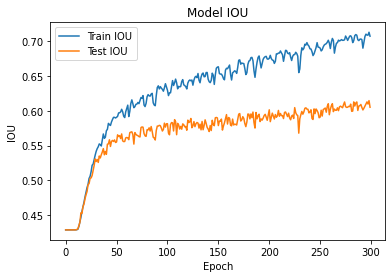

In [44]:
plt.plot(hist2.history['mean_io_u'])
plt.plot(hist2.history['val_mean_io_u'])
plt.title('Model IOU')
plt.ylabel('IOU')
plt.xlabel('Epoch')
plt.legend(['Train IOU', 'Test IOU'], loc='upper left')
plt.show()

Conclusion:

1.Looks good as we are getting 60% Mean IOU after 300 epochs

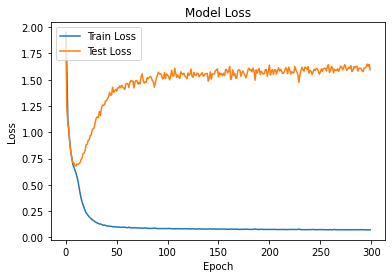

In [45]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Test Loss'], loc='upper left')
plt.show()

In [0]:
#Prediction on test dataset
y_pred = model.predict(test_dataset)

In [0]:
y_predi = tf.argmax(y_pred, axis=3)

In [78]:
y_predi.shape

TensorShape([204, 224, 224])

In [2]:
import numpy as np
# Assigning some RGB colors for the 7 + 1 (Misc) classes
colors = np.array([
    [255, 192, 203],      # Drivable
    [244, 35, 232],     # Non Drivable
    [220, 20, 60],      # Living Things
    [0, 0, 230],        # Vehicles
    [220, 190, 40],     # Road Side Objects
    [70, 70, 70],       # Far Objects
    [70, 130, 180],     # Sky
    [0, 0, 0]           # Misc
], dtype=np.int)


In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import numpy as np
from glob import glob
image_paths = glob('idd20k_lite/leftImg8bit/train/*/*_image.jpg')
label_paths = [p.replace('leftImg8bit', 'gtFine').replace('_image.jpg', '_label.png') for p in image_paths]
image_paths_val = glob('idd20k_lite/leftImg8bit/val/*/*_image.jpg')
label_paths_val = [p.replace('leftImg8bit', 'gtFine').replace('_image.jpg', '_label.png') for p in image_paths_val]

#This function returns the original image, ground truth and predicted output
def output(image_no):
    label_map = imread(label_paths_val[image_no])
    image_frame = imread(image_paths_val[image_no])
    color_image = np.zeros((label_map.shape[0], label_map.shape[1], 3), dtype=np.int)
    for i in range(7):
        color_image[label_map == i] = colors[i]
    color_image[label_map == 255] = colors[7]
    plt.imshow(image_frame)
    #plt.imshow(color_image, alpha=0.5)
    print('Original image is')
    plt.show()
    

    label_map=label_paths_val[image_no]
    image_frame = imread(image_paths_val[image_no])
    color_image = np.zeros((label_map.shape[0], label_map.shape[1], 3), dtype=np.int)
    for i in range(7):
        color_image[label_map == i] = colors[i]
    color_image[label_map == 255] = colors[7]
    plt.imshow(image_frame)
    plt.imshow(color_image, alpha=0.8)
    print('Original masked image is')
    plt.show()
    
    
    label_map=y_predi[image_no]
    image_frame = imread(image_paths_val[image_no])
    color_image = np.zeros((label_map.shape[0], label_map.shape[1], 3), dtype=np.int)
    for i in range(7):
        color_image[label_map == i] = colors[i]
    color_image[label_map == 255] = colors[7]
    plt.imshow(image_frame)
    plt.imshow(color_image, alpha=0.8)
    print('Predicted masked image')
    plt.show()

Original image is


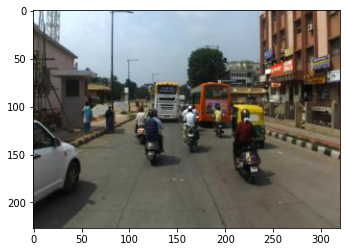

Original masked image is


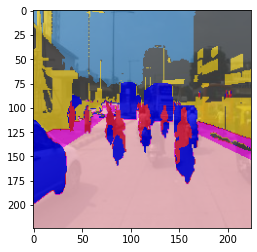

Predicted masked image


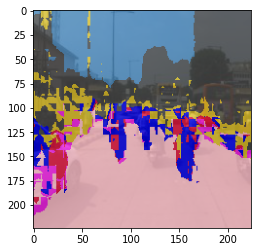

In [126]:
output(1)

Original image is


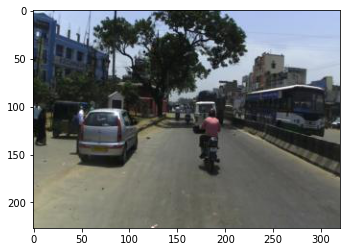

Original masked image is


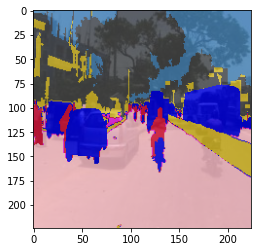

Predicted masked image


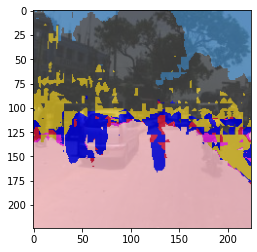

In [128]:
output(106)

Conclusion:
1. Good predictions for highly weighted classes